# Miniproject Joshua Kutschera (heart attack dataset)
This project is based on the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data) from Kaggle.com.

[Idea for chart](https://github.com/holoviz/holoviews/issues/3821)

## About this dataset:

    Age : Age of the patient, 

    Sex : Sex of the patient, 1=male, 0=female
    
    cp : Chest Pain type chest pain type
            Value 1: typical angina
            Value 2: atypical angina
            Value 3: non-anginal pain
            Value 4: asymptomatic
            
    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    rest_ecg : resting electrocardiographic results
            Value 0: normal
            Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
            
    thalach : maximum heart rate achieved

    exng: exercise induced angina (1 = yes; 0 = no)

    oldpeak: ST depression induced by exercise relative to rest (float)

    slp: Slope of the peak exercise ST segment 
        1= upsloping
        2= flat
        3= downsloping
        
    caa: number of major vessels (0-3)

    thall: thal: A blood disorder called thalassemia
        Value 0: NULL (dropped from the dataset previously

        Value 1: fixed defect (no blood flow in some part of the heart)
        
        Value 2: normal blood flow
        
        Value 3: reversible defect (a blood flow is observed but it is not normal)
    
    output (target): 0= less chance of heart attack 1= more chance of heart attack
    
## Dataset Overview
- `age`, `sex`, `cp`, `trtbps`, `chol`, etc., are the features.
- `output` (1 or 0) is the target variable (1 = risk of heart attack).

## Questions
Who is at risk of having a heart attack?
What is the biggest factor playing into being at risk?


 -   Find your favourite dataset
 -   Describe origin and specification of these data
 -   Find 2 research questions (prediction context)
 -   Plot variables of interest (both 1- and 2-variable plots)
 -   Interpret plots
 -   Fit tree, random forest to answer questions
 -   Describe performance (validation, train/test, cross validation)
 -   Compare with linear model (or logistic linear model)

In [1]:
# Step 1: Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import log_loss
from math import sqrt
from scipy.stats import entropy

In [3]:
# Step 2: Load and Describe Dataset
heart_data = pd.read_csv("Data/heart.csv")

print("First 5 rows of the dataset:")
print(heart_data.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(heart_data.info())

# Describe the dataset statistics
print("\nDataset Description:")
print(heart_data.describe())

First 5 rows of the dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol 

In [ ]:
# Step 3: Define Research Questions
# 1. What are the key features that influence heart attack prediction the most?
# 2. How well do machine learning models perform in predicting heart attack risks based on key features?

Missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


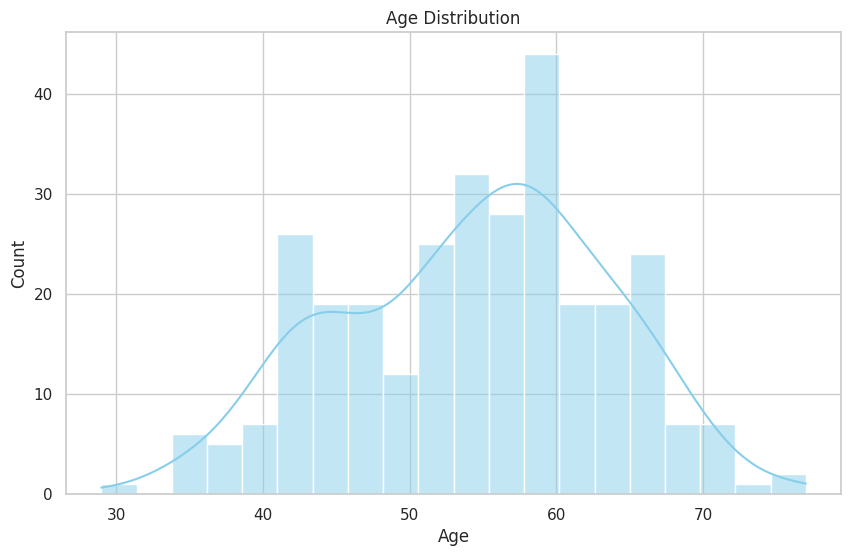

/tmp/ipykernel_28451/343584408.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=heart_data, palette='Set2')


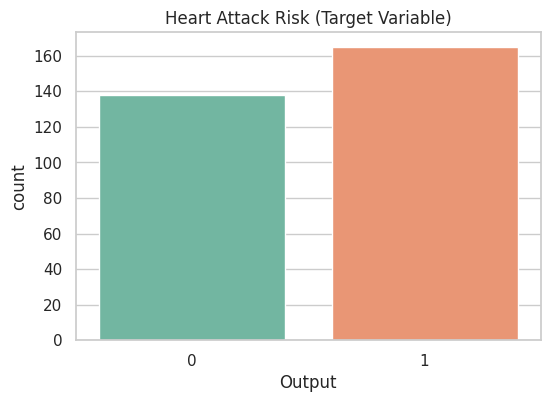

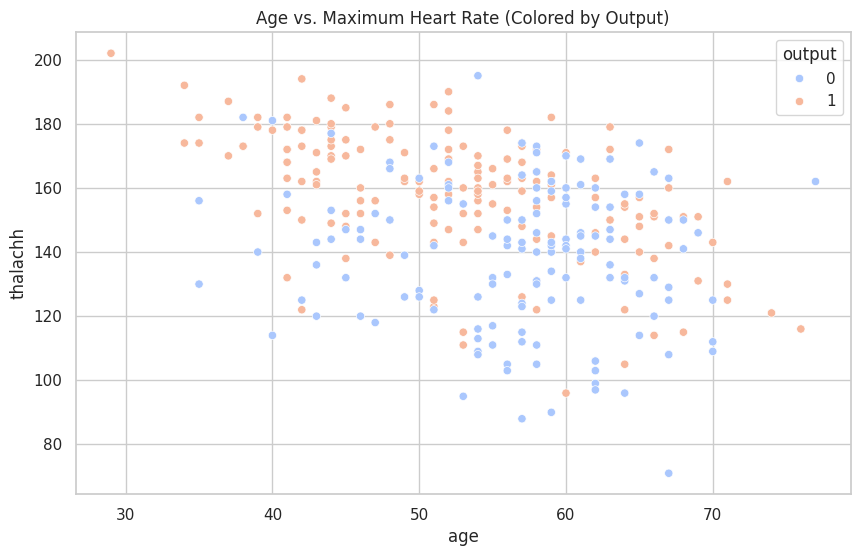

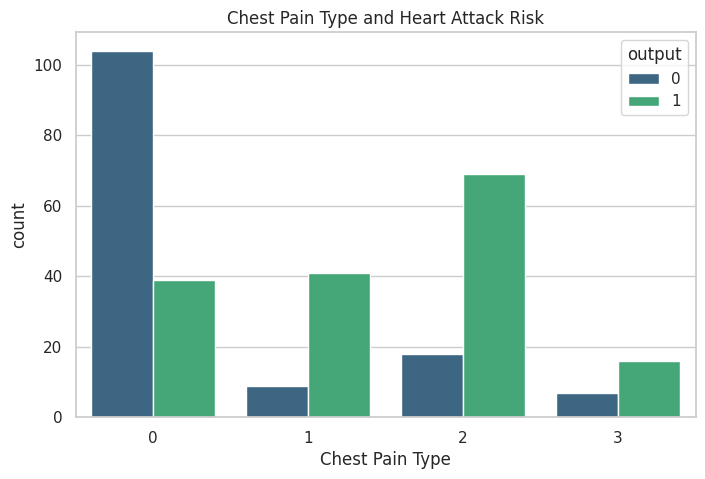

In [4]:
# Step 4: Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values in each column:")
print(heart_data.isnull().sum())

# 4.1 Single-variable plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=heart_data, palette='Set2')
plt.title("Heart Attack Risk (Target Variable)")
plt.xlabel("Output")
plt.show()

# 4.2 Two-variable plots
# Age vs. Maximum Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalachh', hue='output', data=heart_data, palette='coolwarm')
plt.title("Age vs. Maximum Heart Rate (Colored by Output)")
plt.show()

# Chest Pain Type vs. Output
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='output', data=heart_data, palette='viridis')
plt.title("Chest Pain Type and Heart Attack Risk")
plt.xlabel("Chest Pain Type")
plt.show()

In [5]:
# Step 5: Data Preparation
# Separate features (X) and target (y)
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 242 rows
Test set size: 61 rows


In [6]:
# Step 6: Train Decision Tree and Random Forest Models
# 6.1 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 6.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [7]:
# Step 7: Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Step 8: Model Performance Comparison
# Define a function to print metrics
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate models
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)


Decision Tree Performance:
Accuracy: 0.7540983606557377
MSE: 0.2459016393442623
RMSE: 0.4958847036804647
Confusion Matrix:
 [[25  4]
 [11 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61


Random Forest Performance:
Accuracy: 0.8360655737704918
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Logisti

In [9]:
# Step 9: Shannon Entropy for Model Predictions
# Shannon Entropy for Random Forest predictions
def shannon_entropy(y_true, y_pred):
    probabilities = np.bincount(y_pred) / len(y_pred)
    return entropy(probabilities, base=2)

rf_entropy = shannon_entropy(y_test, rf_preds)
print("\nShannon Entropy for Random Forest Predictions:", rf_entropy)


Shannon Entropy for Random Forest Predictions: 0.9982545693874834


In [10]:
### Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", np.mean(rf_cv_scores))


Random Forest Cross-Validation Scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean Accuracy: 0.8381967213114756


In [8]:
# import numpy as np
# data = np.loadtxt("./Data/heart.csv", delimiter=",", skiprows=1)
# X = data[:, :-1]
# Y = data[:, -1]

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# 
# clf = RandomForestClassifier(n_estimators=10, random_state=42)
# 
# clf.fit(X_train, Y_train)
# 
# 
# predictions = clf.predict(X_test)
# accuracy = accuracy_score(Y_test, predictions)
# print("Test Accuracy:", accuracy)
# feature_importances = clf.feature_importances_
# 
# print("Feature Importances:")
# for i, importance in enumerate(feature_importances):
#     print(f"Feature {i}: {importance}")
# 


Test Accuracy: 0.8524590163934426
Feature Importances:
Feature 0: 0.07656258321357846
Feature 1: 0.037190916301048496
Feature 2: 0.08372473207079724
Feature 3: 0.073102984540921
Feature 4: 0.08830322771673946
Feature 5: 0.017574305947343678
Feature 6: 0.02388805612055446
Feature 7: 0.1288887993723594
Feature 8: 0.09452967791135913
Feature 9: 0.09609913623121151
Feature 10: 0.06726894376432285
Feature 11: 0.1263750158499526
Feature 12: 0.08649162095981171
